This is the notebook from the live coding session during seminar 3, 08.09.23

In [23]:
import numpy as np
import pandas as pd

np.random.seed(42)

data = pd.read_csv('/Users/esten/Downloads/Auto.csv')
data = data[data['horsepower'] != '?']
data['horsepower'] = data['horsepower'].astype(int)

predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
target = 'mpg'

data.head()

for col in predictors:
    data[col] = (data[col] - np.mean(data[col])) / np.std(data[col])

data = data.sample(frac=1.)
train = data.iloc[:int(len(data) * 0.8)]
validation = data.iloc[int(len(data) * 0.8):]

print(f'Using {len(train)} samples for training')
print(f'Using {len(validation)} samples for validation')

    

Using 313 samples for training
Using 79 samples for validation


In [24]:
from sklearn.linear_model import Ridge


model = Ridge(alpha=1)
model.fit(train[predictors], train[target])

print(model.coef_)

[-0.74752217  0.9697794   0.17480549 -5.72287636  0.38480084  2.8131015 ]


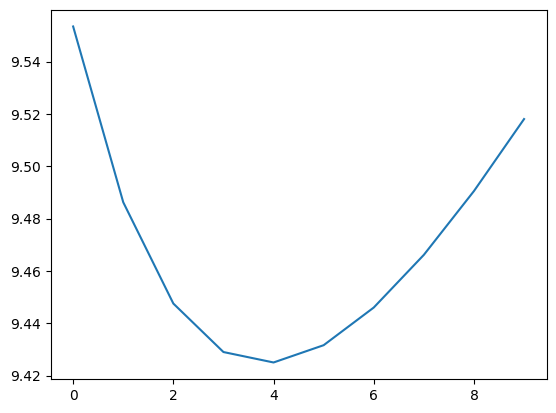

In [26]:
import matplotlib.pyplot as plt


alphas = np.arange(0, 10, 1)
mses = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(train[predictors], train[target])
    
    predictions = model.predict(validation[predictors])
    mse = np.mean((validation[target] - predictions) ** 2)
    mses.append(mse)
    
plt.plot(alphas, mses)